In [ ]:
import pandas as pd


In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving amazon.csv to amazon.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded1['amazon.csv']))

In [ ]:
data

,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,amazon,2021-08-17T06:28:35Z,@1905Beat We get your concern regarding the de...,1905Beat,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427517694627262479
1,amazon,2021-08-16T22:31:19Z,"@MercyKXoXo_ Alexa, play ""I'm So Excited!"" 🥳 L...",MercyKXoXo_,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427397590245642241
2,amazon,2021-08-16T22:31:16Z,@itsashleeg Self care is the best care! ❤️💯 We...,itsashleeg,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427397577906040837
3,amazon,2021-08-16T19:05:00Z,@JenPilarski Thank you for this amazing opport...,JenPilarski,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427345667576434697
4,amazon,2021-08-16T19:00:00Z,It’s #NationalTellAJokeDay – which you definit...,NaN,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427344408979116041
...,...,...,...,...,...,...,...,...,...
3195,amazon,2021-02-12T17:44:02Z,@SportyTechMama Wow! Your crafting skills are ...,SportyTechMama,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360283534246748162
3196,amazon,2021-02-12T17:41:01Z,@callme__phe Awesome! We got your list! 📚 To m...,callme__phe,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360282778072473602
3197,amazon,2021-02-12T17:27:02Z,@ccgg23 Thanks for sending in your in-fur-mati...,ccgg23,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360279257390473217
3198,amazon,2021-02-12T17:22:53Z,@TheBookDreamer2 We're so excited you enjoyed ...,TheBookDreamer2,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360278214585810944


In [ ]:
datad=pd.DataFrame(data.created_at)

In [ ]:
datad


,created_at
0,2021-08-17T06:28:35Z
1,2021-08-16T22:31:19Z
2,2021-08-16T22:31:16Z
3,2021-08-16T19:05:00Z
4,2021-08-16T19:00:00Z
...,...
3195,2021-02-12T17:44:02Z
3196,2021-02-12T17:41:01Z
3197,2021-02-12T17:27:02Z
3198,2021-02-12T17:22:53Z


In [ ]:
from datetime import datetime, timedelta
from pandas import DataFrame

datad['created_at2']=pd.to_datetime(data['created_at'], format="%Y-%m-%dT%H:%M:%SZ")
data['created_at']=pd.to_datetime(data['created_at'], format="%Y-%m-%dT%H:%M:%SZ")
data


,screen_name,created_at,text,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,amazon,2021-08-17 06:28:35,@1905Beat We get your concern regarding the de...,1905Beat,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427517694627262479
1,amazon,2021-08-16 22:31:19,"@MercyKXoXo_ Alexa, play ""I'm So Excited!"" 🥳 L...",MercyKXoXo_,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427397590245642241
2,amazon,2021-08-16 22:31:16,@itsashleeg Self care is the best care! ❤️💯 We...,itsashleeg,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427397577906040837
3,amazon,2021-08-16 19:05:00,@JenPilarski Thank you for this amazing opport...,JenPilarski,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427345667576434697
4,amazon,2021-08-16 19:00:00,It’s #NationalTellAJokeDay – which you definit...,NaN,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1427344408979116041
...,...,...,...,...,...,...,...,...,...
3195,amazon,2021-02-12 17:44:02,@SportyTechMama Wow! Your crafting skills are ...,SportyTechMama,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360283534246748162
3196,amazon,2021-02-12 17:41:01,@callme__phe Awesome! We got your list! 📚 To m...,callme__phe,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360282778072473602
3197,amazon,2021-02-12 17:27:02,@ccgg23 Thanks for sending in your in-fur-mati...,ccgg23,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360279257390473217
3198,amazon,2021-02-12 17:22:53,@TheBookDreamer2 We're so excited you enjoyed ...,TheBookDreamer2,NaN,Official Twitter account of Amazon. Contact @A...,Sprinklr,en,1360278214585810944


In [ ]:
datad

,created_at,created_at2
0,2021-08-17T06:28:35Z,2021-08-17 06:28:35
1,2021-08-16T22:31:19Z,2021-08-16 22:31:19
2,2021-08-16T22:31:16Z,2021-08-16 22:31:16
3,2021-08-16T19:05:00Z,2021-08-16 19:05:00
4,2021-08-16T19:00:00Z,2021-08-16 19:00:00
...,...,...
3195,2021-02-12T17:44:02Z,2021-02-12 17:44:02
3196,2021-02-12T17:41:01Z,2021-02-12 17:41:01
3197,2021-02-12T17:27:02Z,2021-02-12 17:27:02
3198,2021-02-12T17:22:53Z,2021-02-12 17:22:53


In [ ]:
from google.colab import files
emoji = files.upload()

Saving emojidict.pkl to emojidict.pkl


In [ ]:
emojidic = pd.read_pickle('emojidict.pkl')

In [ ]:
print(emojidic)

{'😁': 'Toothy smiley face with laughing eyes', '😂': 'face with tears of joy', '😃': 'smiley face with open mouth', '😄': 'smiley face with open mouth and laughing eyes', '🤣': 'laughing to death rolling on the floor ', '😅': 'Smiling face with open mouth and cold sweats', '😆': 'Smiling face with open mouth and tightly closed eyes', '😇': 'Smiling face with halo', '😉': 'Winking face', '😊': 'Smiley face with laughing eyes', '🙂': ' Slightly smiley face ', '🙃': ' Goofing face ', '☺': ' White smiley face ', '😋': ' Face enjoying delicious food ', '😌': ' Relieved face ', '😍': ' Smiley face with eyeshaped like a heart ', '🥰': ' Smiling face with 3 hearts ', '😘': ' Face sending a kiss ', '😗': ' Face making a kiss ', '😙': ' Face making a kiss with laughing eyes ', '😚': ' Face making a kiss with eyes closed ', '🤪': ' Goofy face ', '😜': 'Face sticking out tongue and winking', '😝': ' Face sticking out tongue with eyes tightly closed ', '😛': ' Face sticking out tongue ', '🤑': ' Face with tickets on the m

In [ ]:
len(emojidic)

1665

In [ ]:
import re
import string


In [ ]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    for i in text:
       if i in emojidic.keys():
          text = re.sub(i, emojidic.get(i), text)
    return text
round1 = lambda x: clean_text_round1(x)

In [ ]:
data_clean = pd.DataFrame(data.text.apply(round1))
data_clean

,text
0,we get your concern regarding the delivery of...
1,mercykxoxo alexa play im so excited Face in ce...
2,itsashleeg self care is the best care Bold bl...
3,jenpilarski thank you for this amazing opportu...
4,its nationaltellajokeday – which you definitel...
...,...
3195,sportytechmama wow your crafting skills are re...
3196,callmephe awesome we got your list books to m...
3197,thanks for sending in your infurmation so fas...
3198,were so excited you enjoyed the surprises Ope...


In [ ]:
data_clean['date']=data['created_at']

In [ ]:
data_clean


,text,date
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00
...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53


In [ ]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('📷', '', text)
    text = re.sub('🛍', '', text)
    text = re.sub('🖌️', '', text)
    text = re.sub('🔦', '', text)
    text = re.sub('🧽', '', text)
    text = re.sub('🖥️', '', text)
    text = re.sub('📧', '', text)
    text = re.sub('💻', '', text)
    text = re.sub('⊙', '', text)
    text = re.sub('🖼️', '', text)
    text = re.sub('✒️', '', text)
    text = re.sub('╱', '', text)
    text = re.sub('╲', '', text)
    text = re.sub('▏', '', text)
    text = re.sub('📓','', text)
    text = re.sub('🔋','', text)
    text = re.sub('▔','', text)
    text = re.sub('▕','', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [ ]:
data_clean = pd.DataFrame(data_clean.text.apply(round2))
data_clean['date']=data['created_at']
data_clean

,text,date
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00
...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
listtext=[]
from nltk.tokenize import TweetTokenizer

for i in data_clean['text']:
   tweet_tokenizer = TweetTokenizer()
   
   tokens = tweet_tokenizer.tokenize(i)
   listtext.append(tokens)
  
data_clean['tokens']=listtext

In [ ]:
data_clean

,text,date,tokens
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv..."
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac..."
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ..."
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ..."
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def..."
...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ..."
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book..."
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ..."
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris..."


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tokens_without_sw =[]
new_stopword=['tell', 'us','person', 'crossed','keep eyes','hands','know','black','sun','sounds like','book','open mouth','several','musical','package','mercykxoxo','ev', 'market', 'mainstream','😎','ev','vehicl','look','now','economics','fund','banking','bank','business','investment','corporate finance','credit','banker','treasury','portfolio','short','investments','financial','capital structure','management','financing','fiscal','funds','monetary','asset','investing','bankroll','equity','money','real estate','minister','public','finance','cash','government','commerce','personal','finance','agriculture','affairs','repayment','planning','deputy','tax','sector','vice','loans','executive','accounting','debt','treasurer','taxation','venture','capital','cash','hand','capital','liability','quaestor','direction']
for i in data_clean['text']:
  text_tokens = word_tokenize(i)
  x=[word for word in text_tokens if not word in stopwords.words()]
  y=[word for word in x if not word in new_stopword ]
  tokens_without_sw.append(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data_clean['tokens_without_sw']=tokens_without_sw
data_clean

,text,date,tokens,tokens_without_sw
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou..."
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets..."
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu..."
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv..."
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce..."
...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really..."
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s..."
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,..."
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear..."


In [ ]:
from nltk.corpus import stopwords 
from wordcloud import WordCloud
stop_words = set(stopwords.words('english')) 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


In [ ]:
text=[]
for i in range(len(tokens_without_sw)) :
  for j in range(len(tokens_without_sw[i])):
      text.append(" "+tokens_without_sw[i][j])
    

In [ ]:
new_text = ""
for w in text:
  if len(w) > 2:
       new_text = new_text + " " + w

In [ ]:
new_text

"  get  concern  regarding  delivery  order  could  let  current  tracking  status  order  assist  accordingly  may  track  order  mohsin  alexa  play  excited  Face  celebration  lets  break  music  Several  notes  twirly  dress  Dress  fancy  shoes  Womans  sandal  time  happy  dance  Dancer  itsashleeg  self  best  Bold  heart  ️One  hundred  xa0points  symbol  hope  enjoy  order  books  Back  extended  middle  finger️  jenpilarski  thank  amazing  opportunity  give  back  community  hope  everyone  teamdundalkes  amazing  school  year  Smiling  hearts  nationaltellajokeday  definitely  cant  celebrate  without  help  say  alexa  joke  funny  chicken  leg  socks  picture  nugget  expected  distinctive  unique  like  Winking  Smiley  eyeshaped  like  heart  close  friends  much  Two  xa0women  holding  Bold  heart  dont  talk  unique  lovely  girl  everyday  Smiling  hearts  sara  happy  help  get  morning  started  great  delivering  smiles  day  Smiley  laughing  eyes  Bold  heart 

Text(0.5, 1.0, 'Amazon top words in comments')

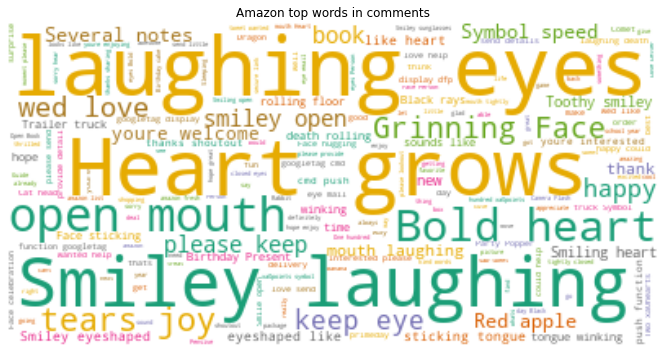

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

wc.generate(new_text)
plt.subplot()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Amazon top words in comments')

In [ ]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tokens_without_sw_stem =[]
for i in data_clean['text']:
  text_tokens = word_tokenize(i)
  x=[word for word in text_tokens if not word in stopwords.words()]
  stem_comments=[stemming.stem(word) for word in x]
  tokens_without_sw_stem.append(stem_comments)


In [ ]:
data_clean['tokens_without_sw_stem']=tokens_without_sw_stem
data_clean

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou...","[get, concern, regard, deliveri, order, could,..."
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,..."
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️..."
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac..."
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce...","[nationaltellajokeday, –, definit, cant, celeb..."
...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo..."
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure..."
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke..."
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro..."


In [ ]:
text=[]
for i in range(3200):
    text.append(' '.join(data_clean['tokens_without_sw_stem'][i]))


  

In [ ]:
data_clean['text_stem']=text

In [ ]:
data_clean

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem,text_stem
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou...","[get, concern, regard, deliveri, order, could,...",get concern regard deliveri order could let us...
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,...",mercykxoxo alexa play excit face celebr let br...
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️...",itsashleeg self best bold black heart ️one hun...
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac...",jenpilarski thank amaz opportun give back comm...
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce...","[nationaltellajokeday, –, definit, cant, celeb...",nationaltellajokeday – definit cant celebr wit...
...,...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo...",sportytechmama wow craft skill realli long hau...
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure...",callmeph awesom got list book make sure get su...
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke...",thank send infurm fast incom envelop keep eye ...
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro...",excit enjoy surpris open book heart grow hope ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(data_clean['text'])

In [ ]:
pip install texthero

     |████████████████████████████████| 235 kB 10.3 MB/s 
     |████████████████████████████████| 1.5 MB 40.0 MB/s 
     |████████████████████████████████| 748 kB 59.6 MB/s 
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import texthero as hero
data_clean['tfidf'] = hero.tfidf(data_clean['text'])

In [ ]:
data_clean

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem,text_stem,tfidf
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou...","[get, concern, regard, deliveri, order, could,...",get concern regard deliveri order could let us...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,...",mercykxoxo alexa play excit face celebr let br...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️...",itsashleeg self best bold black heart ️one hun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac...",jenpilarski thank amaz opportun give back comm...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce...","[nationaltellajokeday, –, definit, cant, celeb...",nationaltellajokeday – definit cant celebr wit...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo...",sportytechmama wow craft skill realli long hau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure...",callmeph awesom got list book make sure get su...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke...",thank send infurm fast incom envelop keep eye ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro...",excit enjoy surpris open book heart grow hope ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
from nltk.corpus import stopwords 
from wordcloud import WordCloud
stop_words = set(stopwords.words('english')) 
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


In [ ]:
text=''
for i in range(len(tokens_without_sw_stem)) :
  for j in range(len(tokens_without_sw_stem[i])):
      text=text+" "+tokens_without_sw_stem[i][j]


In [ ]:
text=[]
for i in range(len(tokens_without_sw_stem)) :
  for j in range(len(tokens_without_sw_stem[i])):
      text.append(" "+tokens_without_sw_stem[i][j])


In [ ]:

new_text = ""
for w in text:
  if len(w) > 2:
       new_text = new_text + " " + w
    

In [ ]:
new_text

"  get  concern  regard  deliveri  order  could  let  us  know  current  track  statu  order  assist  accordingli  may  track  order  mohsin  mercykxoxo  alexa  play  excit  face  celebr  let  break  music  sever  music  note  twirli  dress  dress  fanci  shoe  woman  sandal  time  happi  danc  dancer  packag  itsashleeg  self  best  bold  black  heart  ️one  hundr  xa0point  symbol  hope  enjoy  order  book  back  hand  extend  middl  finger️  jenpilarski  thank  amaz  opportun  give  back  commun  hope  everyon  teamdundalk  amaz  school  year  smile  heart  nationaltellajokeday  definit  cant  celebr  without  help  say  alexa  tell  joke  funni  chicken  leg  sock  pictur  nugget  expect  distinct  uniqu  person  like  wink  smiley  eyeshap  like  heart  close  friend  know  much  two  xa0women  hold  hand  bold  black  heart  dont  talk  uniqu  love  girl  everyday  smile  heart  sara  happi  help  get  morn  start  great  deliv  smile  day  packag  smiley  laugh  eye  bold  black

Text(0.5, 1.0, 'Amazon top words in comments')

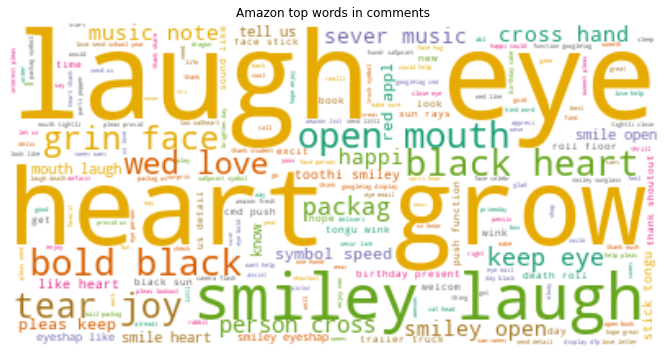

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

wc.generate(new_text)
plt.subplot()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title('Amazon top words in comments')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data_clean.text)
data_dt = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dt.index = data_clean.index
data_dt

,10,aapi,aatamianphoto,aazzuuccaar,ab,abandoned,abbicat,abbiejuls,abd,abdullaalisaif,abigailfla,abigailllleighh,abina,able,abs,absolute,absolutely,absotoothly,academy,accelerator,accept,acceptance,acceso,access,accessibility,accessing,accessories,accessory,accident,accidentally,accompany,according,accordingly,accordinglyharish,account,accountorder,accounts,accountsensitive,accuse,acesso,...,yourrfavorite,yousri,youuuu,youuuuu,youve,youwhite,yulegetlit,yum,yummmm,yummy,yuumikitten,yuvarathnaaswapna,zachmecham,zaidajaninne,zamundan,zamundaroyals,zaraeleus,zelda,zelxbellious,zenerddd,zephonsacriel,zest,zestymeatball,zfhartley,zimmerauthor,zimo,zip,zombie,zorbazuloc,zu,zucchinis,zzzs,çal,über,üzgünüz,とんでもないことでございます,またお困りのことがあれば,今後ともご愛顧賜りますようお願いいたします,ﾟpoint,ﾟstar
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences=common_texts, size=100, window=5, min_count=1, workers=4)
model.save("word2vec.model")

In [ ]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['text'].apply(pol)
data_clean['subjectivity'] = data_clean['text'].apply(sub)
data_clean

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem,text_stem,tfidf,polarity,subjectivity
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou...","[get, concern, regard, deliveri, order, could,...",get concern regard deliveri order could let us...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.400000
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,...",mercykxoxo alexa play excit face celebr let br...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.293750,0.437500
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️...",itsashleeg self best bold black heart ️one hun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.261111,0.316667
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac...",jenpilarski thank amaz opportun give back comm...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.400000,0.600000
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce...","[nationaltellajokeday, –, definit, cant, celeb...",nationaltellajokeday – definit cant celebr wit...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.500000
...,...,...,...,...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo...",sportytechmama wow craft skill realli long hau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.162500,0.525000
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure...",callmeph awesom got list book make sure get su...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.500000,0.629630
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke...",thank send infurm fast incom envelop keep eye ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.200000,0.400000
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro...",excit enjoy surpris open book heart grow hope ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.468750,0.737500


In [ ]:
def label(polarity):
  if polarity >0:
    return 'Positive'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Negative'


In [ ]:
labell = lambda x: label(x)
data_clean['label']=data_clean['polarity'].apply(labell)

In [ ]:
data_clean

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem,text_stem,tfidf,polarity,subjectivity,label
0,we get your concern regarding the delivery of...,2021-08-17 06:28:35,"[we, get, your, concern, regarding, the, deliv...","[get, concern, regarding, delivery, order, cou...","[get, concern, regard, deliveri, order, could,...",get concern regard deliveri order could let us...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.400000,Neutral
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,...",mercykxoxo alexa play excit face celebr let br...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.293750,0.437500,Positive
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️...",itsashleeg self best bold black heart ️one hun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.261111,0.316667,Positive
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac...",jenpilarski thank amaz opportun give back comm...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.400000,0.600000,Positive
4,its nationaltellajokeday – which you definitel...,2021-08-16 19:00:00,"[its, nationaltellajokeday, –, which, you, def...","[nationaltellajokeday, –, definitely, cant, ce...","[nationaltellajokeday, –, definit, cant, celeb...",nationaltellajokeday – definit cant celebr wit...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.000000,0.500000,Neutral
...,...,...,...,...,...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo...",sportytechmama wow craft skill realli long hau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.162500,0.525000,Positive
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure...",callmeph awesom got list book make sure get su...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.500000,0.629630,Positive
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke...",thank send infurm fast incom envelop keep eye ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.200000,0.400000,Positive
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro...",excit enjoy surpris open book heart grow hope ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.468750,0.737500,Positive


In [ ]:
positive_text=data_clean.loc[data_clean['label'] == 'Positive']

In [ ]:
positive_text

,text,date,tokens,tokens_without_sw,tokens_without_sw_stem,text_stem,tfidf,polarity,subjectivity,label
1,mercykxoxo alexa play im so excited Face in ce...,2021-08-16 22:31:19,"[mercykxoxo, alexa, play, im, so, excited, Fac...","[alexa, play, excited, Face, celebration, lets...","[mercykxoxo, alexa, play, excit, face, celebr,...",mercykxoxo alexa play excit face celebr let br...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.293750,0.437500,Positive
2,itsashleeg self care is the best care Bold bl...,2021-08-16 22:31:16,"[itsashleeg, self, care, is, the, best, care, ...","[itsashleeg, self, best, Bold, heart, ️One, hu...","[itsashleeg, self, best, bold, black, heart, ️...",itsashleeg self best bold black heart ️one hun...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.261111,0.316667,Positive
3,jenpilarski thank you for this amazing opportu...,2021-08-16 19:05:00,"[jenpilarski, thank, you, for, this, amazing, ...","[jenpilarski, thank, amazing, opportunity, giv...","[jenpilarski, thank, amaz, opportun, give, bac...",jenpilarski thank amaz opportun give back comm...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.400000,0.600000,Positive
5,the funny chicken leg socks and your picture ...,2021-08-16 18:11:59,"[the, funny, chicken, leg, socks, and, your, p...","[funny, chicken, leg, socks, picture, nugget, ...","[funni, chicken, leg, sock, pictur, nugget, ex...",funni chicken leg sock pictur nugget expect di...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.096667,0.700000,Positive
6,were happy that we can help get your morning ...,2021-08-16 18:11:24,"[were, happy, that, we, can, help, get, your, ...","[happy, help, get, morning, started, great, de...","[happi, help, get, morn, start, great, deliv, ...",happi help get morn start great deliv smile da...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.441667,0.712500,Positive
...,...,...,...,...,...,...,...,...,...,...
3195,sportytechmama wow your crafting skills are re...,2021-02-12 17:44:02,"[sportytechmama, wow, your, crafting, skills, ...","[sportytechmama, wow, crafting, skills, really...","[sportytechmama, wow, craft, skill, realli, lo...",sportytechmama wow craft skill realli long hau...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.162500,0.525000,Positive
3196,callmephe awesome we got your list books to m...,2021-02-12 17:41:01,"[callmephe, awesome, we, got, your, list, book...","[callmephe, awesome, got, list, books, make, s...","[callmeph, awesom, got, list, book, make, sure...",callmeph awesom got list book make sure get su...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.500000,0.629630,Positive
3197,thanks for sending in your infurmation so fas...,2021-02-12 17:27:02,"[thanks, for, sending, in, your, infurmation, ...","[thanks, sending, infurmation, fast, Incoming,...","[thank, send, infurm, fast, incom, envelop, ke...",thank send infurm fast incom envelop keep eye ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.200000,0.400000,Positive
3198,were so excited you enjoyed the surprises Ope...,2021-02-12 17:22:53,"[were, so, excited, you, enjoyed, the, surpris...","[excited, enjoyed, surprises, Open, Book, Hear...","[excit, enjoy, surpris, open, book, heart, gro...",excit enjoy surpris open book heart grow hope ...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.468750,0.737500,Positive


In [ ]:
len(positive_text)

2544

In [ ]:
len(positive_text[1:2001])

2000

In [ ]:
negative_text=data_clean.loc[data_clean['label'] == 'Negative']

In [ ]:
len(negative_text)

265

In [ ]:

frames1=(positive_text[1:2001],negative_text[1:201])
training_data=pd.concat(frames1, sort=False)

frames2=(positive_text[2000:2411],negative_text[200:253])
testing_data=pd.concat(frames2, sort=False)

In [ ]:
len(training_data)

2200

In [ ]:
len(testing_data)

464

In [ ]:
data = data_clean[['date','text','label','tokens_without_sw_stem','text_stem']]
data.to_csv("data.csv", sep=",", index=False)
files.download("data.csv")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
datap = data_clean[['date','text','label','polarity','subjectivity','tokens_without_sw_stem']]
datap.to_csv("datap.csv", sep=",", index=False)
files.download("datap.csv")  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>